In [1]:
!pip install -Uqq fastai ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 99.8 MB/s eta 0:00:00


In [4]:
from ddgs import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

## Mountain classifier
## Matterhorn vs Assiniboine ("Matterhorn of the Rockies")

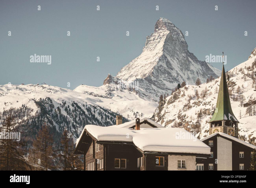

In [6]:
from fastdownload import download_url
from fastai.vision.all import *

download_url(search_images('matterhorn in winter', max_images=1)[0], 'matterhorn.jpg', show_progress=False)
Image.open('matterhorn.jpg').to_thumb(256,256)

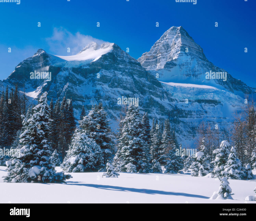

In [7]:
download_url(search_images('assiniboine in winter', max_images=1)[0], 'assiniboine.jpg', show_progress=False)
Image.open('assiniboine.jpg').to_thumb(256,256)

In [8]:
searches = 'matterhorn','assiniboine'
path = Path('matterhorn_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} in winter'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

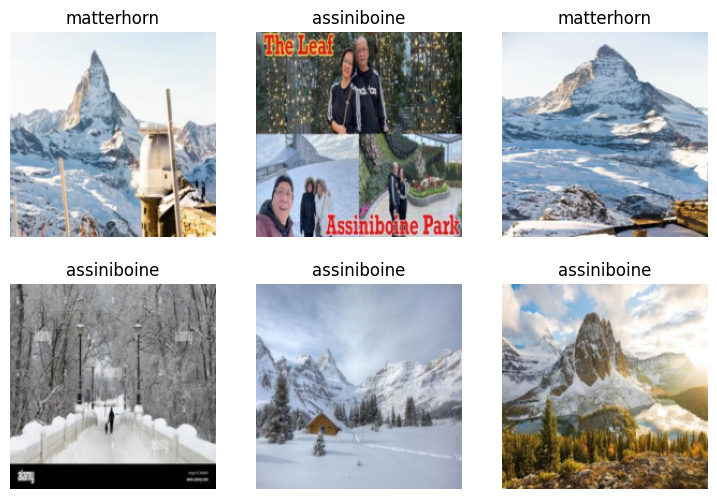

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 61.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.055349,1.528476,0.411765,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.444818,0.414629,0.205882,00:35
1,0.364753,0.191548,0.088235,00:29
2,0.269599,0.176305,0.088235,00:26
3,0.201096,0.195214,0.088235,00:26
4,0.163337,0.206198,0.088235,00:26


In [12]:
is_matterhorn,_,probs = learn.predict(PILImage.create('matterhorn.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a matterhorn: {probs[1]:.4f}")

This is a: matterhorn.
Probability it's a matterhorn: 0.9941


In [14]:
is_matterhorn,_,probs = learn.predict(PILImage.create('assiniboine.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a assiniboine: {probs[0]:.4f}")

This is a: assiniboine.
Probability it's a assiniboine: 0.6885
